# Exercises on Natural Language Processing with Convolutional Neural Networks

## Exercise 3

In [1]:
import pandas as pd
import warnings
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import fasttext.util
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
def read_conllu(file_path):
    df = pd.DataFrame(columns=['Sentence', 'POS_Tags'])
    Pos_Tags = ''
    sentence = ''

    with open(file_path, 'r', encoding='utf-8') as file:
        i = -1
        for line in file:
            line = line.strip()
            if line == '':
                if (sentence != ''):
                    sentence = sentence.lstrip()
                    Pos_Tags = Pos_Tags.lstrip()
                    new_row = {'Sentence': sentence, 'POS_Tags': Pos_Tags}
                    df = df.append(new_row, ignore_index=True)
                    Pos_Tags = ''
                    sentence = ''
            elif line.startswith('#'):
                continue
            else:
                tokens = line.split('\t')
                word = tokens[1]
                POS_tag = tokens[3]
                if (POS_tag != "SYM" and POS_tag != "PART" and POS_tag != "_"):
                    sentence = sentence + " " + word
                    Pos_Tags = Pos_Tags + " " + POS_tag
    return df

In [3]:
train_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-train.conllu")
train_df

,Sentence,POS_Tags
0,Le infrastrutture come fattore di competitivit...,DET NOUN ADP NOUN ADP NOUN ADP PROPN PROPN PUNCT
1,In gli ultimi anni la dinamica di i polo di at...,ADP DET ADJ NOUN DET NOUN ADP DET NOUN ADP NOU...
2,Il raggiungimento e il mantenimento di posizio...,DET NOUN CCONJ DET NOUN ADP NOUN ADJ AUX ADV A...
3,Quest' ultimo è funzione di variabili struttur...,DET ADJ AUX NOUN ADP NOUN ADJ ADP PRON DET NOU...
4,"Il contesto milanese , se da un lato è stato t...",DET NOUN ADJ PUNCT SCONJ ADP DET NOUN AUX AUX ...
...,...,...
8272,Premio Elsa Morante .,NOUN PROPN PROPN PUNCT
8273,È nato il premio Elsa Morante che verrà assegn...,AUX VERB DET NOUN PROPN PROPN PRON AUX VERB DE...
8274,Questo Premio che non avrà sede fissa né statu...,DET PROPN PRON ADV VERB NOUN ADJ ADV NOUN ADV ...
8275,sono promotori di l' iniziativa Patrizia Caval...,AUX NOUN ADP DET NOUN PROPN PROPN PUNCT PROPN ...


In [4]:
test_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-test.conllu")
test_df

,Sentence,POS_Tags
0,Non sono consentite assegnazioni provvisorie i...,ADV AUX VERB NOUN ADJ ADP DET NOUN ADP DET NOU...
1,È consentita inoltre la partecipazione provvis...,AUX VERB ADV DET NOUN ADJ ADV ADP DET ADJ NOUN...
2,I predetti motivi devono costituire oggetto di...,DET ADJ NOUN AUX VERB NOUN ADP NOUN PUNCT PRON...
3,In caso di ricongiungimento a il familiare des...,ADP NOUN ADP NOUN ADP DET NOUN VERB ADP ADJ NO...
4,A i fini di la possibilità di presentazione di...,ADP DET NOUN ADP DET NOUN ADP NOUN ADP DET NOU...
...,...,...
1062,Scrooge era il suo unico esecutore testamentar...,PROPN AUX DET DET ADJ NOUN ADJ PUNCT ADJ NOUN ...
1063,"Anzi il nostro Scrooge , che per verità il tri...",CCONJ DET DET PROPN PUNCT PRON ADP NOUN DET AD...
1064,Il ricordo di i funerali mi fa tornare a il pu...,DET NOUN ADP DET NOUN PRON VERB VERB ADP DET N...
1065,Non c' è dunque dubbio che Marley era morto .,ADV PRON AUX ADV NOUN SCONJ PROPN AUX VERB PUNCT


In [5]:
dev_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-dev.conllu")
dev_df

,Sentence,POS_Tags
0,"Ha l' acqua calda , più o meno si veste .",VERB DET NOUN ADJ PUNCT ADV CCONJ ADV PRON VER...
1,malgrado le guerre e i disastri naturali e pol...,ADP DET NOUN CCONJ DET NOUN ADJ CCONJ ADJ PUNC...
2,È come un' energia che sta crescendo complessi...,AUX ADP NUM NOUN PRON AUX VERB ADV PUNCT PUNCT
3,"L' onorevole Charles Rose , deputato democrati...",DET NOUN PROPN PROPN PUNCT NOUN ADJ ADP DET PR...
4,"Da qualche tempo , la sua espressione preferit...",ADP DET ADV PUNCT DET DET NOUN ADJ AUX VERB PUNCT
...,...,...
738,Le gravi esigenze di salute di l' aspirante a ...,DET ADJ NOUN ADP NOUN ADP DET NOUN ADP DET NOU...
739,"Possono chiedere l' assegnazione provvisoria ,...",AUX VERB DET NOUN ADJ PUNCT ADV ADP DET NOUN A...
740,La relativa domanda va formulata contestualmen...,DET ADJ NOUN AUX VERB ADV ADP PRON ADP NOUN PU...
741,Possono partecipare a il movimento di le asseg...,AUX VERB ADP DET NOUN ADP DET NOUN ADJ ADV DET...


In [6]:
def calculate_word_upper_boundary(df, column_name):
   
    df['Sentence_Length'] = df[column_name].apply(lambda x: len(x.split()))
    Q1 = df['Sentence_Length'].quantile(0.25)
    Q3 = df['Sentence_Length'].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR

    return upper_boundary

In [7]:
upper_boundary = calculate_word_upper_boundary(train_df, 'Sentence')

# Display the result
print("Upper Boundary for Words in a Sentence:", upper_boundary)

Upper Boundary for Words in a Sentence: 73.0


In [8]:
train_df['Sentence_Length'] = train_df['Sentence'].apply(lambda x: len(x.split()))
train_df = train_df[train_df['Sentence_Length'] <= 80]
test_df['Sentence_Length'] = test_df['Sentence'].apply(lambda x: len(x.split()))
test_df = test_df[test_df['Sentence_Length'] <= 80]
dev_df['Sentence_Length'] = dev_df['Sentence'].apply(lambda x: len(x.split()))
dev_df = dev_df[dev_df['Sentence_Length'] <= 80]
train_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)
test_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)
dev_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)

In [9]:
X_train = train_df['Sentence'].apply(lambda x: x.split()).tolist()
y_train = train_df['POS_Tags'].apply(lambda x: x.split()).tolist()
X_test = test_df['Sentence'].apply(lambda x: x.split()).tolist()
y_test = test_df['POS_Tags'].apply(lambda x: x.split()).tolist()
X_dev = dev_df['Sentence'].apply(lambda x: x.split()).tolist()
y_dev = dev_df['POS_Tags'].apply(lambda x: x.split()).tolist()

In [10]:
unique_elements = set(element for sublist in y_train for element in sublist)
unique_elements_list = list(unique_elements)
print("Unique Elements:", unique_elements_list)

Unique Elements: ['PRON', 'CCONJ', 'SCONJ', 'PUNCT', 'AUX', 'NUM', 'ADJ', 'DET', 'NOUN', 'VERB', 'INTJ', 'PROPN', 'ADV', 'X', 'ADP']


In [11]:
unique_elements = set(element for sublist in y_dev for element in sublist)
unique_elements_list = list(unique_elements)
print("Unique Elements:", unique_elements_list)

Unique Elements: ['PRON', 'CCONJ', 'NUM', 'PUNCT', 'AUX', 'SCONJ', 'ADJ', 'DET', 'VERB', 'NOUN', 'INTJ', 'PROPN', 'ADV', 'X', 'ADP']


In [12]:
print('sample X_train: ', X_train[0], '\n')
print('sample y_train: ', y_train[0], '\n')

sample X_train:  ['Le', 'infrastrutture', 'come', 'fattore', 'di', 'competitività', 'di', 'Angela', 'Airoldi', '.'] 

sample y_train:  ['DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'PUNCT'] 



In [13]:
word_tokenizer = Tokenizer(oov_token='__UNK__')              # instantiate tokeniser
word_tokenizer.fit_on_texts(X_train)            # fit tokeniser on data
# use the tokeniser to encode input sequence
X_train_encoded = word_tokenizer.texts_to_sequences(X_train)
X_test_encoded = word_tokenizer.texts_to_sequences(X_test)
X_dev_encoded = word_tokenizer.texts_to_sequences(X_dev)
# encode Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(y_train)
y_train_encoded = tag_tokenizer.texts_to_sequences(y_train)
y_test_encoded = tag_tokenizer.texts_to_sequences(y_test)
y_dev_encoded = tag_tokenizer.texts_to_sequences(y_dev)
# look at first encoded data point
print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', X_train[0], '\n')
print('Y: ', y_train[0], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', X_train_encoded[0], '\n')
print('Y: ', y_train_encoded[0], '\n')

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Le', 'infrastrutture', 'come', 'fattore', 'di', 'competitività', 'di', 'Angela', 'Airoldi', '.'] 

Y:  ['DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'PUNCT'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [12, 1835, 36, 3660, 2, 2801, 2, 10163, 10164, 5] 

Y:  [3, 1, 2, 1, 2, 1, 2, 7, 7, 4] 



In [14]:
MAX_SEQ_LENGTH = 80
X_train_padded = pad_sequences(X_train_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_train_padded = pad_sequences(y_train_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
X_test_padded = pad_sequences(X_test_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_test_padded = pad_sequences(y_test_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
X_dev_padded = pad_sequences(X_dev_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_dev_padded = pad_sequences(y_dev_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
# print the first sequence
print(X_train_padded[0], "\n"*3)
print(y_train_padded[0])

[   12  1835    36  3660     2  2801     2 10163 10164     5     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0] 



[3 1 2 1 2 1 2 7 7 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [15]:
fasttext.util.download_model('it', if_exists='ignore')  # Italian
ft = fasttext.load_model('cc.it.300.bin')

In [16]:
EMBEDDING_SIZE  = 300  
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
word2id = word_tokenizer.word_index
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = ft[word]
    except KeyError:
        pass

In [17]:
embedding_weights.shape[1]

300

In [18]:
embedding_weights.shape[0]

20584

In [19]:
from tensorflow.keras.utils import to_categorical

max_class_index = np.max(y_train_padded)

# Convert non-zero elements to categorical
num_classes = max_class_index +1
y_train = to_categorical(y_train_padded, num_classes=num_classes)
y_test = to_categorical(y_test_padded, num_classes=num_classes)
y_dev = to_categorical(y_dev_padded, num_classes=num_classes)

In [20]:
y_train.shape[2]

16

In [21]:
dict_match = {}
for i in range(8158):
    for j in range(len(train_df.iloc[i,1].split())):
        dict_match[train_df.iloc[i,1].split()[j]] = y_train[i,j]
    
modified_dict = {key: np.argmax(value,-1) for key, value in dict_match.items()}

def create_reverse_dict(dictionary):
    reverse_dict = {v: k for k, v in dictionary.items()}
    return reverse_dict

modified_dict_1 = create_reverse_dict(modified_dict)

In [22]:
NUM_CLASSES = y_train.shape[2]
NUM_CLASSES

16

In [23]:
def evaluate_model(X, y, model,set_name):
    y_pred_1 = model.predict(X)
    y_pred = np.argmax(y_pred_1, axis=-1)
    y_pred = y_pred.flatten()
    y_true = np.argmax(y, axis=-1)
    y_true = y_true.flatten()
    valid_labels = [label for label in y_true if label != 0]
    valid_predictions = [pred for true, pred in zip(y_true, y_pred) if true != 0]

    print(f"-----------Predection Scores for {set_name}-----------")
    # Create a classification report
    report = classification_report(valid_labels, valid_predictions, target_names=[modified_dict_1[i] for i in range(1, 16)])
    print(report)

    
    y_pred_labels = np.argmax(y_pred_1, axis=1)
    precision = dict()
    recall = dict()
    pr_auc = dict()
    max_prob_indices = np.argmax(y_pred_1, axis=2)
    # Create a binary matrix with 1s where the highest probability is and 0s elsewhere
    y_pred_2 = np.zeros_like(y_pred_1)
    for i in range(y_pred_1.shape[0]):
        for j in range(y_pred_1.shape[1]):
            y_pred_2[i, j, max_prob_indices[i, j]] = 1
            
            
    for i in range(1,16):
        precision[i], recall[i], _ = precision_recall_curve(y[:,:,i].flatten(), y_pred_2[:,:,i].flatten())
        pr_auc[i] = auc(recall[i], precision[i])

    # Step 3: Print or use the calculated scores for each class
    for i in range(1,16):
        print(f"Class {modified_dict_1[i]} - AUC-PR: {pr_auc[i]}")

    # Step 4: Calculate macro AUC-PR
    all_recall = np.unique(np.concatenate([recall[i] for i in range(1,16)]))
    mean_precision = np.zeros_like(all_recall)
    for i in range(1,16):
        mean_precision += np.interp(all_recall, recall[i][::-1], precision[i][::-1])
    mean_precision /= num_classes
    macro_pr_auc = auc(all_recall, mean_precision)

    # Step 5: Print or use the calculated macro AUC-PR
    print(f"Macro AUC-PR: {macro_pr_auc}")
    return

In [24]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, TimeDistributed, Dense,  Dropout, Conv1D,GlobalMaxPooling1D,RepeatVector


MAX_SEQUENCE_LENGTH = 80
FILTERS = 300  # the dimensionality of the output space (i.e. the number of output filters in the convolution)
KERNEL = 3  # the length of the 1D convolution window


# create empty sequential model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, # Size of the vocabulary, i.e. maximum integer index + 1
                                    output_dim=EMBEDDING_SIZE,
                                    weights=[embedding_weights],
                                    input_length=MAX_SEQUENCE_LENGTH,
                                    mask_zero=True,
                                    trainable=False))
model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=KERNEL,
                                 activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=KERNEL,
                                 activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=KERNEL,
                                 activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=KERNEL,
                                 activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=KERNEL,
                                 activation='relu', padding='same'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

print(model.summary())
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam())
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/checkpoints/keras_CNN_model', monitor='val_accuracy',
    save_best_only=True, mode='max'
    )
history = model.fit(X_train_padded, y_train,
              batch_size=64,
              epochs=10,
              verbose = 1,
              callbacks=[checkpoint],
              validation_data=(X_dev_padded, y_dev),
              shuffle=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 300)           6175200   
                                                                 
 conv1d (Conv1D)             (None, 80, 300)           270300    
                                                                 
 conv1d_1 (Conv1D)           (None, 80, 300)           270300    
                                                                 
 conv1d_2 (Conv1D)           (None, 80, 300)           270300    
                                                                 
 conv1d_3 (Conv1D)           (None, 80, 300)           270300    
                                                                 
 conv1d_4 (Conv1D)           (None, 80, 300)           270300    
                                                                 
 dense (Dense)               (None, 80, 16)            

INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 12s 85ms/step - loss: 0.3899 - accuracy: 0.9007 - val_loss: 0.1528 - val_accuracy: 0.9552
Epoch 2/10
127/128 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9771INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 10s 80ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 3/10
128/128 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9842INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 10s 82ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0953 - val_accuracy: 0.9712
Epoch 4/10
127/128 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9872INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 11s 82ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 5/10
128/128 [==============================] - 10s 74ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0998 - val_accuracy: 0.9690
Epoch 6/10
127/128 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9908INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 10s 81ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0981 - val_accuracy: 0.9719
Epoch 7/10
127/128 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9917INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


INFO:tensorflow:Assets written to: /content/checkpoints\keras_CNN_model\assets


128/128 [==============================] - 14s 108ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 8/10
128/128 [==============================] - 13s 100ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.1010 - val_accuracy: 0.9692
Epoch 9/10
128/128 [==============================] - 13s 103ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.1015 - val_accuracy: 0.9721
Epoch 10/10
128/128 [==============================] - 14s 106ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.1184 - val_accuracy: 0.9693


## Hyperparameter Tuning

In [25]:
def build_model(hp):
    
    MAX_SEQUENCE_LENGTH = 80
    FILTERS = 300  # the dimensionality of the output space (i.e. the number of output filters in the convolution)
    KERNEL = 3  # the length of the 1D convolution window

    model = Sequential()
    model.add(Embedding(input_dim = VOCABULARY_SIZE,
     output_dim = EMBEDDING_SIZE,
     input_length = MAX_SEQ_LENGTH,
     weights = [embedding_weights],
     trainable = False))
    
    
    for i in range(hp.Int(name='num_layers',min_value=1,max_value=5)):
        model.add(tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=hp.Choice(name='kernel_'+str(i),values=[2,3,4]),
                                                                                activation='relu', padding='same'))
        model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=hp_learning_rate),
              metrics=['acc'])

    return model

In [26]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


tuner = kt.RandomSearch(build_model,
                        objective=kt.Objective('val_acc',
                                               direction='max'),
                        max_trials=20,
                        directory='KT_directory',
                        project_name='KT_tuning')
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
kernel_0 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
dropout_layer_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [27]:
tuner.search(X_train_padded, y_train,
             validation_data=(X_dev_padded, y_dev), epochs=50, batch_size = 64,
             callbacks=[early_stopping])

Trial 20 Complete [00h 01m 53s]
val_acc: 0.9746964573860168

Best val_acc So Far: 0.9769464135169983
Total elapsed time: 01h 49m 41s


In [28]:
tuner.results_summary()

Results summary
Results in KT_directory\KT_tuning
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 17 summary
Hyperparameters:
num_layers: 3
kernel_0: 2
dropout_layer_0: 0.2
learning_rate: 0.0001
kernel_1: 4
dropout_layer_1: 0.3
kernel_2: 4
dropout_layer_2: 0.2
kernel_3: 3
dropout_layer_3: 0.1
kernel_4: 3
dropout_layer_4: 0.4
Score: 0.9769464135169983

Trial 16 summary
Hyperparameters:
num_layers: 2
kernel_0: 4
dropout_layer_0: 0.4
learning_rate: 0.001
kernel_1: 4
dropout_layer_1: 0.4
kernel_2: 3
dropout_layer_2: 0.4
kernel_3: 4
dropout_layer_3: 0.2
kernel_4: 4
dropout_layer_4: 0.2
Score: 0.9767678380012512

Trial 06 summary
Hyperparameters:
num_layers: 4
kernel_0: 2
dropout_layer_0: 0.1
learning_rate: 0.0001
kernel_1: 4
dropout_layer_1: 0.1
kernel_2: 2
dropout_layer_2: 0.4
kernel_3: 4
dropout_layer_3: 0.3
kernel_4: 2
dropout_layer_4: 0.3
Score: 0.9767321348190308

Trial 09 summary
Hyperparameters:
num_layers: 3
kernel_0: 4
dropout_layer_0: 0.2
learning_rate: 0.

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, Dropout, Dense, Add, Input
from tensorflow.keras.optimizers import Adam

MAX_SEQUENCE_LENGTH = 80
FILTERS = 300  # the dimensionality of the output space (i.e. the number of output filters in the convolution)

inputs = Input(shape=(MAX_SEQ_LENGTH,))

# Embedding layer
embedding_layer = Embedding(
    input_dim=VOCABULARY_SIZE,
    output_dim=EMBEDDING_SIZE,
    input_length=MAX_SEQ_LENGTH,
    trainable=False
)(inputs)

# First convolution layer
conv1 = Conv1D(filters=FILTERS, kernel_size=2, activation='relu', padding='same')(embedding_layer)
conv1 = Dropout(0.2)(conv1)

# Second convolution layer with residual connection
conv2 = Conv1D(filters=FILTERS, kernel_size=4, activation='relu', padding='same')(conv1)
conv2 = Dropout(0.3)(conv2)
residual_conv2 = Conv1D(filters=FILTERS, kernel_size=1, padding='same')(conv1)
conv2 = Add()([conv2, residual_conv2])

# Third convolution layer with residual connection
conv3 = Conv1D(filters=FILTERS, kernel_size=4, activation='relu', padding='same')(conv2)
conv3 = Dropout(0.2)(conv3)
residual_conv3 = Conv1D(filters=FILTERS, kernel_size=1, padding='same')(conv2)
conv3 = Add()([conv3, residual_conv3])

# Dense layer for classification
output_layer = Dense(NUM_CLASSES, activation='softmax')(conv3)

# Create the model
model = Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['acc']
)

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 80)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 80, 300)              6175200   ['input_2[0][0]']             
                                                                                                  
 conv1d_5 (Conv1D)           (None, 80, 300)              180300    ['embedding_1[0][0]']         
                                                                                                  
 dropout_3 (Dropout)         (None, 80, 300)              0         ['conv1d_5[0][0]']            
                                                                                              

In [27]:
import time
import os
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
if not os.path.exists('./checkpoints'):
  os.makedirs('./checkpoints')
# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint(
    'checkpoints/weights.hdf5',
    monitor='val_accuracy',
    mode='max',
    verbose=2,
    save_best_only=True,
    save_weights_only=True
    )
start_training_time = time.time()


history = model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_dev_padded, y_dev),
    batch_size=64,
    epochs=50,
    shuffle=True,
    callbacks=[early_stopping, checkpoint]
    )
end_training_time = time.time()

print(f'\nTraining time: {time.strftime("%H:%M:%S", time.gmtime(end_training_time - start_training_time))} \n')

Epoch 1/50


127/128 [============================>.] - ETA: 0s - loss: 0.4138 - accuracy: 0.8746
Epoch 1: val_accuracy improved from -inf to 0.91159, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 10s 68ms/step - loss: 0.4130 - accuracy: 0.8748 - val_loss: 0.2774 - val_accuracy: 0.9116
Epoch 2/50
127/128 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9360
Epoch 2: val_accuracy improved from 0.91159 to 0.92929, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 8s 66ms/step - loss: 0.1947 - accuracy: 0.9361 - val_loss: 0.2162 - val_accuracy: 0.9293
Epoch 3/50
127/128 [============================>.] - ETA: 0s - loss: 0.1518 - accuracy: 0.9502
Epoch 3: val_accuracy improved from 0.92929 to 0.94262, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 8s 66ms/step - loss: 0.1519 - accuracy: 0.9502 - val_loss: 0.1791 - val_accuracy: 0.9426
Epoch 4/50
127/128 [=====

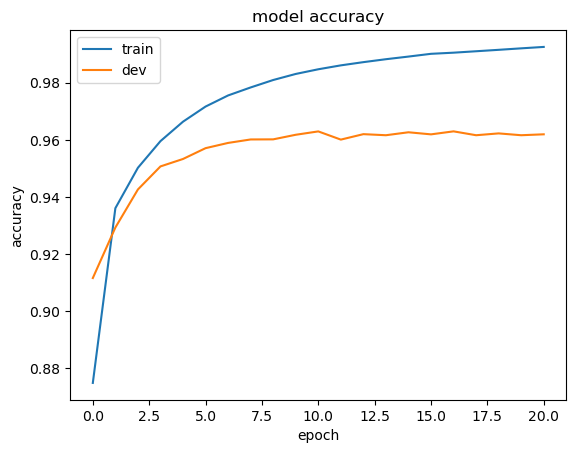

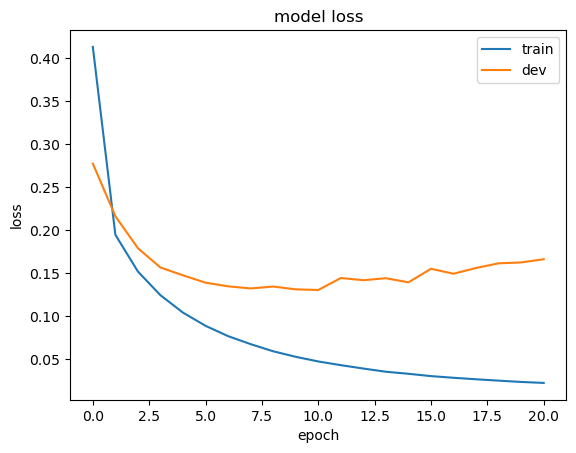

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [29]:
test = evaluate_model(X_test_padded, y_test, model,"Test Set")

34/34 [==============================] - 0s 11ms/step
-----------Predection Scores for Test Set-----------
              precision    recall  f1-score   support

        NOUN       0.82      0.91      0.86      4813
         ADP       0.99      0.99      0.99      3723
         DET       0.97      0.99      0.98      3776
       PUNCT       1.00      1.00      1.00      3272
        VERB       0.84      0.75      0.79      2229
         ADJ       0.68      0.76      0.72      1496
       PROPN       0.75      0.51      0.60      1249
         ADV       0.89      0.91      0.90      1210
         AUX       0.95      0.93      0.94      1033
        PRON       0.90      0.88      0.89      1225
       CCONJ       0.96      0.94      0.95       750
         NUM       0.90      0.80      0.85       401
       SCONJ       0.85      0.74      0.79       313
           X       0.50      0.11      0.19        44
        INTJ       0.73      0.69      0.71        16

    accuracy               

In [30]:
test = evaluate_model(X_train_padded, y_train, model,"Train Set")

255/255 [==============================] - 3s 12ms/step
-----------Predection Scores for Train Set-----------
              precision    recall  f1-score   support

        NOUN       0.99      1.00      0.99     43174
         ADP       1.00      1.00      1.00     33895
         DET       1.00      1.00      1.00     33530
       PUNCT       1.00      1.00      1.00     24499
        VERB       1.00      0.99      1.00     16428
         ADJ       0.99      0.99      0.99     15242
       PROPN       0.99      0.97      0.98      9827
         ADV       0.99      0.99      0.99      8401
         AUX       1.00      1.00      1.00      7260
        PRON       0.98      0.99      0.99      7244
       CCONJ       0.99      0.99      0.99      6315
         NUM       0.99      0.98      0.99      5007
       SCONJ       0.97      0.94      0.96      1671
           X       0.99      0.78      0.87       270
        INTJ       0.98      0.70      0.82        61

    accuracy            

In [31]:
test = evaluate_model(X_dev_padded, y_dev, model,"Dev Set")

22/22 [==============================] - 0s 11ms/step
-----------Predection Scores for Dev Set-----------
              precision    recall  f1-score   support

        NOUN       0.88      0.91      0.89      5874
         ADP       0.99      1.00      0.99      4793
         DET       0.98      0.99      0.99      4030
       PUNCT       1.00      1.00      1.00      2073
        VERB       0.80      0.76      0.78      1704
         ADJ       0.77      0.74      0.75      1992
       PROPN       0.37      0.37      0.37       316
         ADV       0.90      0.90      0.90       720
         AUX       0.93      0.96      0.95       768
        PRON       0.91      0.91      0.91       882
       CCONJ       0.95      0.95      0.95       622
         NUM       0.92      0.72      0.80       437
       SCONJ       0.82      0.74      0.78       149
           X       0.57      0.06      0.11        64
        INTJ       0.00      0.00      0.00         2

    accuracy                